# Exercise: applying differential privacy by means of Python-DP library 
## Safety, Privacy and Legal Aspects - Master in Data Science (2022/2023)
### Name: Miriam Perez Perez

In [1]:
# Install PyDP
#!pip install python-dp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pydp as dp
from pydp.algorithms.laplacian import BoundedSum, Count, BoundedMean, Max, Min

# ... other libraries you may need

#### Download and read the widely known Stroke Prediction Dataset  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. Remove NaN values and answer the following questions:

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data = data.dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### 1. Calculate using differential privacy (DP) for an epsilon value of your choice, how many women have suffered a stroke. And considering women aged 60 years and older? Repeat the same for men.

#### In both cases, compare the results with those obtained if DP is not applied.

In [4]:
#### ejemplo clase
epsilon = 0.8
df_women = data[data.gender == 'Female']
women_stroke = sum(df_women.stroke.values)
x = BoundedSum(epsilon, lower_bound=0, upper_bound=1)
women_stroke_dp = x.quick_result(df_women.stroke.values)

print("Total number of strokes for women:", women_stroke)
print("Total number of strokes for women with DP (epsilon={}):".format(epsilon), women_stroke_dp)
######

Total number of strokes for women: 120
Total number of strokes for women with DP (epsilon=0.8): 120


In [5]:
epsilon = 0.14 
x = Count(epsilon=epsilon)

women_stroke = len(data[(data['gender'] == 'Female') & (data['stroke'] == 1)])
women_stroke_dp = x.quick_result([1] * data[(data['gender'] == 'Female') & (data['stroke'] == 1)].shape[0])

men_stroke = len(data[(data['gender'] == 'Male') & (data['stroke'] == 1)])
men_stroke_dp = x.quick_result([1] * data[(data['gender'] == 'Male') & (data['stroke'] == 1)].shape[0])

print("Total number of women who have suffered a stroke:", women_stroke)
print("Total number of women who have suffered a stroke with DP (epsilon={}):".format(epsilon), women_stroke_dp)
print("Total number of men who have suffered a stroke:", men_stroke)
print("Total number of men who have suffered a stroke with DP (epsilon={}):".format(epsilon), men_stroke_dp)


women60_stroke = len(data[(data['gender'] == 'Female') & (data['age'] >= 60) & (data['stroke'] == 1)])
women60_stroke_count_dp = x.quick_result([1] * data[(data['gender'] == 'Female') & (data['age'] >= 60) & (data['stroke'] == 1)].shape[0])

men60_stroke = len(data[(data['gender'] == 'Male') & (data['age'] >= 60) & (data['stroke'] == 1)])
men60_stroke_count_dp = x.quick_result([1] * data[(data['gender'] == 'Male') & (data['age'] >= 60) & (data['stroke'] == 1)].shape[0])

# Print results
print("Number of strokes in women aged 60 years and older without DP:", women60_stroke)
print("Number of strokes in women aged 60 years and older with DP (epsilon={}):".format(epsilon), women60_stroke_count_dp)
print("Number of strokes in men aged 60 years and older without DP:", men60_stroke)
print("Number of strokes in men aged 60 years and older with DP (epsilon={}):".format(epsilon), men60_stroke_count_dp)


Total number of women who have suffered a stroke: 120
Total number of women who have suffered a stroke with DP (epsilon=0.14): 110
Total number of men who have suffered a stroke: 89
Total number of men who have suffered a stroke with DP (epsilon=0.14): 87
Number of strokes in women aged 60 years and older without DP: 84
Number of strokes in women aged 60 years and older with DP (epsilon=0.14): 84
Number of strokes in men aged 60 years and older without DP: 66
Number of strokes in men aged 60 years and older with DP (epsilon=0.14): 66


#### 2. For all women who have suffered a stroke, calculate the mean BMI applying PD for a certain epsilon value.  Repeat the same for those who have not suffered a stroke. 

#### Compare the results with those obtained if DP is not applied.

In [6]:
epsilon = 0.14  

women_stroke = data[(data['gender'] == 'Female') & (data['stroke'] == 1)]
women_no_stroke = data[(data['gender'] == 'Female') & (data['stroke'] == 0)]

# Calculate mean BMI for women who have suffered a stroke without DP
mean_bmi_women_stroke = women_stroke['bmi'].mean()
mean_bmi_women_no_stroke = women_no_stroke['bmi'].mean()

# Filter data for women who have suffered a stroke and those who haven't
women_stroke_data = data[(data['gender'] == 'Female') & (data['stroke'] == 1)]
women_no_stroke_data = data[(data['gender'] == 'Female') & (data['stroke'] == 0)]

# Calculate mean BMI for women who have or not suffered a stroke with DP
dp_mean_bmi_stroke = BoundedMean(lower_bound=0, upper_bound=100, epsilon=epsilon, dtype="float")
mean_bmi_stroke_with_dp = dp_mean_bmi_stroke.quick_result(women_stroke_data['bmi'].tolist())

# Calculate mean BMI for women who have not suffered a stroke with DP
dp_mean_bmi_no_stroke = BoundedMean(lower_bound=0, upper_bound=100, epsilon=epsilon, dtype="float")
mean_bmi_no_stroke_with_dp = dp_mean_bmi_no_stroke.quick_result(women_no_stroke_data['bmi'].tolist())

print("Mean BMI for women who have suffered a stroke:", mean_bmi_women_stroke)
print("Mean BMI for women who have not suffered a stroke:", mean_bmi_women_no_stroke)
print("Mean BMI for women who have suffered a stroke with DP (epsilon={}):".format(epsilon), mean_bmi_stroke_with_dp)
print("Mean BMI for women who have not suffered a stroke with DP (epsilon={}):".format(epsilon), mean_bmi_no_stroke_with_dp)


Mean BMI for women who have suffered a stroke: 30.21833333333333
Mean BMI for women who have not suffered a stroke: 29.015952466690674
Mean BMI for women who have suffered a stroke with DP (epsilon=0.14): 38.48278378427607
Mean BMI for women who have not suffered a stroke with DP (epsilon=0.14): 29.745242201154145


#### 3. For all the people who have suffered a stroke, calculate (by applying PD) how many of them suffered from hypertension.  Repeat the same for those who have not suffered a stroke. 

#### Compare the results with those obtained if DP is not applied.

In [7]:
hypertension = data[data.hypertension == 1]
stroke_hypertension = sum(hypertension.stroke.values)

no_stroke = data[data.stroke == 0]
no_stroke_hypertension = sum(no_stroke.hypertension.values)

epsilon = 0.14
x = BoundedSum(epsilon, lower_bound=0, upper_bound=1)
stroke_hypertension_dp = x.quick_result(hypertension.stroke.values)
no_stroke_hypertension_dp = x.quick_result(no_stroke.hypertension.values)

# Print the results
print("Number of individuals who suffered a stroke among those with hypertension:", stroke_hypertension)
print("Number of individuals who suffered a stroke among those with hypertension (Applying DP):", stroke_hypertension_dp)

print("Number of individuals with hypertension but without stroke:", no_stroke_hypertension)
print("Number of individuals with hypertension but without stroke (Applying DP):", no_stroke_hypertension_dp)


Number of individuals who suffered a stroke among those with hypertension: 60
Number of individuals who suffered a stroke among those with hypertension (Applying DP): 56
Number of individuals with hypertension but without stroke: 391
Number of individuals with hypertension but without stroke (Applying DP): 399


#### 4. Calculate the avgerage glucose level of all the people who have suffered a stroke. Compare this result graphically with that obtained by applying DP as a function of the epsilon value introduced (e.g., you can test what happens even with epsilon values higher than 1, epsilon = [0.1, 0.2, 0.3,...,10]). 

#### What property of differential privacy and the privacy budget (epsilon) do you see reflected in this case?

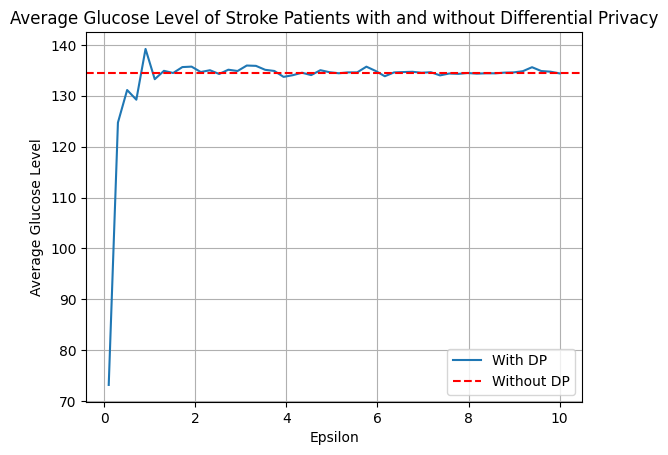

In [8]:
stroke = data[data['stroke'] == 1]
stroke_average_glucose = stroke['avg_glucose_level'].mean()

epsilon_values = np.linspace(0.1, 10)

average_glucose_dp = []
for epsilon in epsilon_values:
    dp_mean_glucose = BoundedMean(lower_bound=0, upper_bound=300, epsilon=epsilon, dtype="float")  
    average_glucose_with_dp = dp_mean_glucose.quick_result(stroke['avg_glucose_level'].tolist())
    average_glucose_dp.append(average_glucose_with_dp)

plt.plot(epsilon_values, average_glucose_dp, label='With DP')
plt.axhline(y=stroke_average_glucose, color='r', linestyle='--', label='Without DP')
plt.xlabel('Epsilon')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level of Stroke Patients with and without Differential Privacy')
plt.legend()
plt.grid(True)
plt.show()


A medida que los valores de epsilon aumentan, el nivel de privacidad disminuye. Esto se debe a que un epsilon alto permite añadir mas ruido a los datos, lo que reduce los riesgos de violaciones de privacidad.

Este trade-off muestra el principio fundamental de la privacidad diferencial, la privacidad de los individuos se protege a costa de cierta pérdida en la precisión de los datos, y el presupuesto de privacidad (epsilon) controla el equilibrio entre la privacidad y la utilidad de los datos.


#### 5. Compare by means of bar charts the total number of people who have suffered a stroke according to the age range grouped in intervals of 20 years. Compare in each case the result obtained without applying differential privacy and the one obtained by applying DP for a pre-fixed epsilon value.

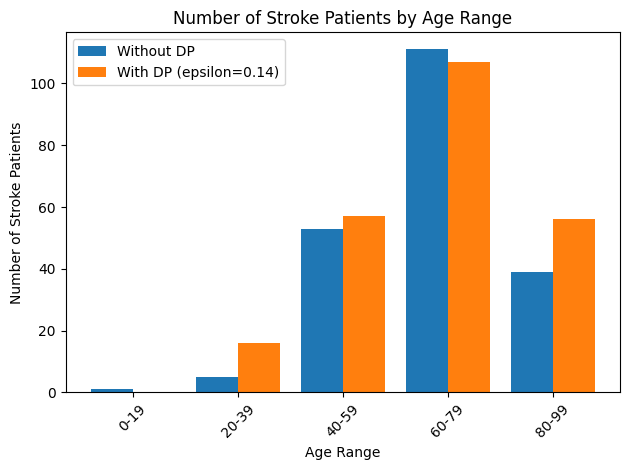

In [9]:
# Convert age_ranges to integers
age_intervals = np.arange(0, 101, 20).astype(int)

# Initialize lists to store counts without and with DP
counts_no_dp = []
counts_with_dp = []

# Calculate counts without applying DP
for i in range(len(age_intervals)-1):
    count = len(data[(data['age'] >= age_intervals[i]) & (data['age'] < age_intervals[i+1]) & (data['stroke'] == 1)])
    counts_no_dp.append(count)

epsilon = 0.14

# Calculate counts with applying DP (using a pre-fixed epsilon value)
for i in range(len(age_intervals)-1):
    df_age_range = data[(data['age'] >= age_intervals[i]) & (data['age'] < age_intervals[i+1])]
    x = BoundedSum(epsilon, lower_bound=0, upper_bound=1)  
    count_dp = x.quick_result(df_age_range['stroke'].values.tolist())
    
    # Ensure that the count is not below 0
    count_dp = max(count_dp, 0)
    
    counts_with_dp.append(count_dp)

# Plot bar charts
age_range_labels = [f"{interval}-{interval+19}" for interval in age_intervals[:-1]]

x = np.arange(len(age_range_labels))
width = 0.4

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, counts_no_dp, width, label='Without DP')
bars2 = ax.bar(x + width/2, counts_with_dp, width, label='With DP (epsilon={})'.format(epsilon))

ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Stroke Patients')
ax.set_title('Number of Stroke Patients by Age Range')
ax.set_xticks(x)
ax.set_xticklabels(age_range_labels)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
